In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

In [31]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [29]:
nmad = lambda x: 1.4826*np.median(np.abs(x-np.median(x)))
error_of_the_mean = lambda x: nmad(x)/np.sqrt(len(x))

from scipy import stats

def binned_median(x, y, nbins=25):
    vmin, vmax = np.percentile(x, [0.2, 99.7])
    bins = np.linspace(vmin, vmax, nbins)
    bin_median, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='median', bins=bins)
    bin_error, _, _ = stats.binned_statistic(x, y, statistic=error_of_the_mean, bins=bins)    
    bin_center = (bin_edges[1:] + bin_edges[:-1])/2
    return bin_center, bin_edges, bin_median, bin_error

In [26]:
cat = Table(fitsio.read('/global/cscratch1/sd/rongpu/temp/dr10_i_band_photom.fits'))
print(len(cat), len(np.unique(cat['gaia_sourceid'])))

3486810 901638


In [27]:
cat[:5]

flux,dflux,chi2,fracmasked,ra_fit,dec_fit,instpsfmag,dpsfmag,bitmask,psfmag,x_ref,y_ref,x_fit,y_fit,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ra_gaia,dec_gaia,gaia_sourceid,ra_now,dec_now,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,ps1_z,ps1_r,ps1_i,ra_ps1,ps1_g,ps1_objid,legacy_survey_mag,dec_ps1,ps1_y,expnum,ccdname,filter,exptime,gain,airmass,apflux_6,apflux_6_err,apflux_7,apflux_7_err,apflux_8,apflux_8_err,ra,dec,fwhm,psfdepth,meansky,stdsky,ebv
float32,float32,float64,float32,float64,float64,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float32,int64,float32,float64,float32,int64,str4,str1,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32
196574.44,286.8646,2.280764579772949,0.0,83.40778575738722,-6.549082436158384,-8.348211,0.0015844342,0,16.928747,1397.1279,2914.4937,1397.0752,2914.4194,17.939356,19.515684,16.682457,83.40778111497355,-6.549008528737125,3016758193755780224,83.40779120787136,-6.549086270754339,0.0018628596,0.041138288,0.0066835885,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,963379,S29,i,90.0,3.494456354960085,1.09,192148.19,407.06055,193951.11,455.66263,195109.12,505.75336,83.40778111497355,-6.549008528737125,3.775987,23.247807,0.9283569,0.0019845255,0.2830186
617433.6,463.57346,13.854076385498047,0.0,83.41186155282,-6.545388614146764,-9.59087,0.0008151782,0,15.686089,1346.4707,2969.916,1346.3887,2969.7974,16.670956,18.435415,15.379664,83.41186858864756,-6.5453946702890065,3016758198052877952,83.41187026817943,-6.545394586025962,0.0010838917,0.015151935,0.0024988921,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,963379,S29,i,90.0,3.494456354960085,1.09,603995.25,528.5277,609330.1,567.7477,612899.1,609.29834,83.41186858864756,-6.5453946702890065,3.775987,23.247807,0.9283569,0.0019845255,0.2830186
209963.95,297.2264,2.883225440979004,0.0,83.38621252042256,-6.498862093504702,-8.419756,0.0015369755,0,16.857203,707.47833,2620.2336,707.3901,2620.139,17.766933,20.435188,16.205458,83.38620361003113,-6.498870265753801,3016770430119733248,83.3862194714404,-6.498868521244885,0.0019397003,0.08071881,0.007811161,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,963379,S29,i,90.0,3.494456354960085,1.09,204144.12,416.15085,206370.77,465.4524,208123.6,516.2726,83.38620361003113,-6.498870265753801,3.775987,23.247807,0.9283569,0.0019845255,0.2830186
212812.38,291.15817,490.970947265625,0.0,83.3811707505924,-6.5281812276975835,-8.434386,0.0014854444,0,16.842571,1110.278,2552.003,1109.858,2552.0308,17.949247,19.194815,16.47267,83.38116496873495,-6.5282026737254935,3016758472928489344,83.38116865839436,-6.528211817377122,0.0020869863,0.0399533,0.025468126,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,963379,S29,i,90.0,3.494456354960085,1.09,256097.81,428.8096,258459.11,476.00568,260000.9,524.8917,83.38116496873495,-6.5282026737254935,3.775987,23.247807,0.9283569,0.0019845255,0.2830186
209235.97,292.82248,52.1895866394043,0.0,83.48143190199407,-6.491290114487559,-8.415984,0.0015194708,0,16.860973,604.1937,3915.5906,604.09436,3915.4038,17.871552,19.157347,16.468735,83.48144422809987,-6.491297468644582,3016760362716376960,83.48144562742078,-6.491297345383155,0.0018296997,0.088806316,0.01248817,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,963379,S29,i,90.0,3.494456354960085,1.09,253699.28,429.63333,257541.61,477.59482,259712.88,526.9201,83.48144422809987,-6.491297468644582,3.775987,23.247807,0.9283569,0.0019845255,0.2830186


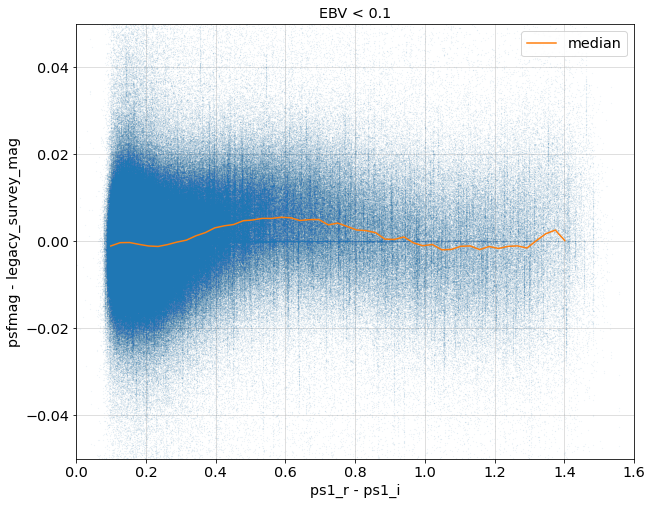

In [50]:
mask = cat['legacy_survey_mag']!=0
mask &= cat['psfmag']!=0
cat = cat[mask]

mask = cat['fracmasked']<0.1
cat = cat[mask]

mask = (cat['ps1_i']<18.) & (cat['ps1_i']>16)
mask &= cat['ebv']<0.1

x, y = (cat['ps1_r']-cat['ps1_i'])[mask], (cat['psfmag']-cat['legacy_survey_mag'])[mask]
bin_center, bin_edges, bin_median, bin_error = binned_median(x, y, nbins=50)

plt.figure(figsize=(10, 8))
plt.plot(x, y, '.', ms=0.1, alpha=0.5)
plt.plot(bin_center, bin_median, label='median')
plt.xlabel('ps1_r - ps1_i')
plt.ylabel('psfmag - legacy_survey_mag')
plt.grid(alpha=0.5)
plt.axis([0., 1.6, -0.05, 0.05])
plt.legend(loc='upper right')
plt.title('EBV < 0.1')
plt.show()

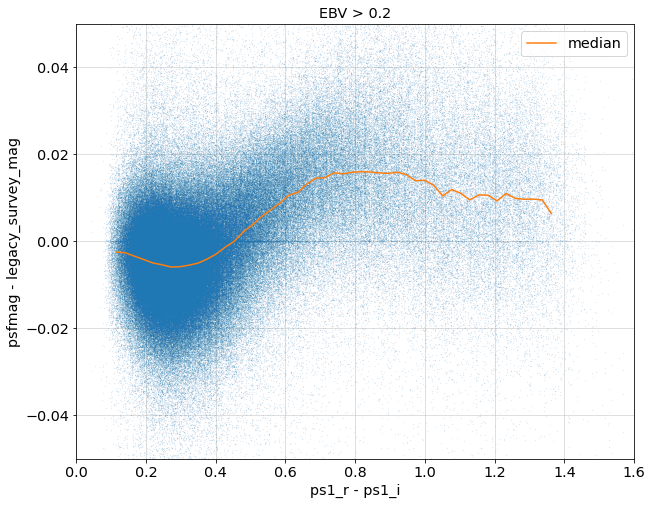

In [51]:
mask = cat['legacy_survey_mag']!=0
mask &= cat['psfmag']!=0
cat = cat[mask]

mask = cat['fracmasked']<0.1
cat = cat[mask]

mask = (cat['ps1_i']<18.) & (cat['ps1_i']>16)
mask &= cat['ebv']>0.2

x, y = (cat['ps1_r']-cat['ps1_i'])[mask], (cat['psfmag']-cat['legacy_survey_mag'])[mask]
bin_center, bin_edges, bin_median, bin_error = binned_median(x, y, nbins=50)

plt.figure(figsize=(10, 8))
plt.plot(x, y, '.', ms=0.1, alpha=1)
plt.plot(bin_center, bin_median, label='median')
plt.xlabel('ps1_r - ps1_i')
plt.ylabel('psfmag - legacy_survey_mag')
plt.grid(alpha=0.5)
plt.axis([0., 1.6, -0.05, 0.05])
plt.legend(loc='upper right')
plt.title('EBV > 0.2')
plt.show()